## Никитенкова Мария БПМ181

## **Задание 1**


1. In(a)=1/n-a*In-1(a)
2. I0(а) = ln(1+1/a)
3. Чтобы вычислить прямой рекурсией значения I25(0.1) и I25(10) буде использовать начальное значение из пункта 2. Для обратной рекурсии будем считать, что I50 = 0, потому что интеграл стремится к 0 при больших n. 





In [8]:
from math import log

def rec_straight(a,n): #прямая рекурсия
  i = log(a + 1) - log(a)
  for k in range(1, n+1):
    i = 1/k -a*i
  return i

def rec_back(a,n): #обратная рекурсия
  i = 0
  for k in range(50, n+1, -1):
    i = (1/k -i) / a
  return i

In [9]:
rec_straight(0.1, 25)

0.03622697090911682

In [10]:
rec_straight(10, 25)

916988169.5363449

In [11]:
rec_back(0.1, 25)

-1.8148212719543063e+22

In [12]:
rec_back(10, 25)

0.003378004364718689

При а=0.1 в прямой рекурсии ошибка каждый раз умножалась на число меньшее 1, т.е. она стремилась к 0, а в обратной рекурсии на каждом шагу она умножалась на 10, это видно из отрицательного результата. При а=10 все наоброт, обратная рекурсия дала более верный результат, так как ошибка каждый раз делилась на 10, в случае прямой рекурсии она умножалась, увеличивалась.

## **Задание 4**

In [15]:
import math 
def round_n(x,n):
  if x==0:
    return x
  else:
    return round(x, -int(math.floor(math.log10(abs(x))))+(n-1))

In [16]:
res = 0
for i in range(1, 3001):
  res = round_n(res+(1/i**2), 4)
  
print(res)

1.624


С некоторого момента 1/n^2 становится меньше еденицы последнего разряда суммы, то есть при округлении вовсе отбрасывается, поэтому имеем всего 2 значащие цифры. Чтобы получить улучшенный результат начнем суммирование с младших разрядов.

In [17]:
res = 0
for i in range(3000, 0, -1):
  res = round_n(res+(1/i**2), 4)
  
print(res)

1.645


## **Задание 5**

In [32]:
m1 = 40e4
e1 = 0.05e4
m2 = 30e4
e2 = 0.1e4
r = 3.2
e3 = 0.01
G = 6.67e-11
print(m1, e1, m2, e2, r, e3)

400000.0 500.0 300000.0 1000.0 3.2 0.01


In [33]:
from numpy.random import normal # создаем набор данных
coll = []
for i in range(100000):
  M1 = normal(m1, e1)
  M2 = normal(m2, e2)
  R = normal(r, e3)
  F = (G * M1 * M2) / R ** 2
  coll.append(F)

In [34]:
F_mean = G * m1 * m2 / r ** 2
F_error = abs(G * m2 * e1 / r ** 2) + abs(G * m1 * e2 / r ** 2) + abs( - 2 * G * m1 * m2 * e3 / r ** 3)
F_dev = (G * m2 * e1 / r ** 2) ** 2 + (G * m1 * e2 / r ** 2) ** 2 + ( - 2 * G * m1 * m2 * e3 / r ** 3) ** 2
print("F = ", round(F_mean, 5), "+-", round(F_error, 5))
print("F_dev = ", round(F_dev, 7))

F =  0.78164 +- 0.00847
F_dev =  3.16e-05


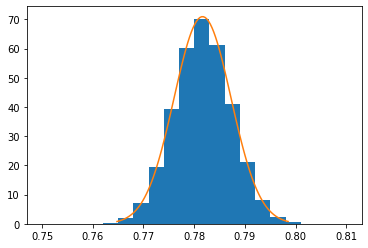

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
plt.hist(coll, range = (0.75, 0.81), bins = 20, density = True)
mu = F_mean
variance = F_dev
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

In [36]:
e1_ = 2e4
e2_ = 10e4
e3_ = 1

In [37]:
coll_ = []
for i in range(100000):
  M1 = normal(m1, e1_)
  M2 = normal(m2, e2_)
  R = normal(r, e3_)
  F = (G * M1 * M2) / R ** 2
  coll_.append(F)

(array([0.00210157, 0.02482475, 0.26098828, 0.82007062, 1.04605468,
        0.92718483, 0.73719009, 0.55809723, 0.41276078, 0.30610628,
        0.23524409, 0.18441245, 0.14730667, 0.11689963, 0.09384807,
        0.07473696, 0.06462317, 0.0531959 , 0.04741659, 0.04078352]),
 array([-0.25  , -0.0875,  0.075 ,  0.2375,  0.4   ,  0.5625,  0.725 ,
         0.8875,  1.05  ,  1.2125,  1.375 ,  1.5375,  1.7   ,  1.8625,
         2.025 ,  2.1875,  2.35  ,  2.5125,  2.675 ,  2.8375,  3.    ]),
 <a list of 20 Patch objects>)

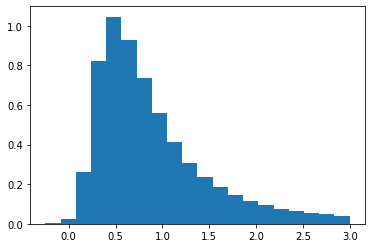

In [39]:
plt.hist(coll_, range = (-0.25, 3), bins = 20, density = True)